In [28]:
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot
import matplotlib.pyplot as plt
import pytz

In [2]:
raw_df = pd.read_csv('./enphase-data-2019-2020.csv')

In [3]:
raw_df.head()

Unnamed: 0                  Date/Time  Energy Produced (Wh)  \
0           0  2019-09-01 00:00:00 -0300                     0   
1           1  2019-09-01 00:15:00 -0300                     0   
2           2  2019-09-01 00:30:00 -0300                     0   
3           3  2019-09-01 00:45:00 -0300                     0   
4           4  2019-09-01 01:00:00 -0300                     0   

   Energy Consumed (Wh)  Exported to Grid (Wh)  Imported from Grid (Wh)  
0                  1263                      0                     1263  
1                   548                      0                      548  
2                   665                      0                      665  
3                   525                      0                      525  
4                   508                      0                      508

In [4]:
raw_df.columns

Index(['Unnamed: 0', 'Date/Time', 'Energy Produced (Wh)',
       'Energy Consumed (Wh)', 'Exported to Grid (Wh)',
       'Imported from Grid (Wh)'],
      dtype='object')

In [5]:
raw_df.drop(columns='Unnamed: 0',inplace=True)
raw_df.rename(columns={'Date/Time':'time',
                   'Energy Produced (Wh)':'prod',
                   'Energy Consumed (Wh)':'cons',
                   'Exported to Grid (Wh)':'exp',
                   'Imported from Grid (Wh)':'imp'}, inplace=True)

In [6]:
raw_df['time'] = pd.to_datetime(raw_df['time'],utc=True)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70176 entries, 0 to 70175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   time    70176 non-null  datetime64[ns, UTC]
 1   prod    70176 non-null  int64              
 2   cons    70176 non-null  int64              
 3   exp     70176 non-null  int64              
 4   imp     70176 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4)
memory usage: 2.7 MB


In [8]:
raw_df.head()

time  prod  cons  exp   imp
0 2019-09-01 03:00:00+00:00     0  1263    0  1263
1 2019-09-01 03:15:00+00:00     0   548    0   548
2 2019-09-01 03:30:00+00:00     0   665    0   665
3 2019-09-01 03:45:00+00:00     0   525    0   525
4 2019-09-01 04:00:00+00:00     0   508    0   508

In [9]:
raw_df.time = raw_df.time.dt.tz_convert('Atlantic/Bermuda')

In [10]:
raw_df

time  prod  cons  exp   imp
0     2019-09-01 00:00:00-03:00     0  1263    0  1263
1     2019-09-01 00:15:00-03:00     0   548    0   548
2     2019-09-01 00:30:00-03:00     0   665    0   665
3     2019-09-01 00:45:00-03:00     0   525    0   525
4     2019-09-01 01:00:00-03:00     0   508    0   508
...                         ...   ...   ...  ...   ...
70171 2020-06-30 22:45:00-03:00     0   541    0   541
70172 2020-06-30 23:00:00-03:00     0  1000    0  1000
70173 2020-06-30 23:15:00-03:00     0   434    0   434
70174 2020-06-30 23:30:00-03:00     0   444    0   444
70175 2020-06-30 23:45:00-03:00     0   460    0   460

[70176 rows x 5 columns]

In [11]:
raw_df.time.dt.hour

0         0
1         0
2         0
3         0
4         1
         ..
70171    22
70172    23
70173    23
70174    23
70175    23
Name: time, Length: 70176, dtype: int64

In [12]:
day_df = raw_df.loc[(raw_df['time'].dt.hour > 7) & (raw_df['time'].dt.hour < 19),:]

In [14]:
day_df.head(50)

time  prod  cons   exp   imp
32  2019-09-01 08:00:00-03:00    55  2323     0  2268
33  2019-09-01 08:15:00-03:00    68  2111     0  2043
34  2019-09-01 08:30:00-03:00    98   607     0   509
35  2019-09-01 08:45:00-03:00   173   754     0   581
36  2019-09-01 09:00:00-03:00   299   622     0   323
37  2019-09-01 09:15:00-03:00   388  1383     0   995
38  2019-09-01 09:30:00-03:00   579   576     3     0
39  2019-09-01 09:45:00-03:00   872   919     0    47
40  2019-09-01 10:00:00-03:00  1148   401   747     0
41  2019-09-01 10:15:00-03:00  1293   401   892     0
42  2019-09-01 10:30:00-03:00  1468   385  1083     0
43  2019-09-01 10:45:00-03:00  1591   377  1214     0
44  2019-09-01 11:00:00-03:00  1758   551  1207     0
45  2019-09-01 11:15:00-03:00  1682  2199     0   517
46  2019-09-01 11:30:00-03:00  1786  2019     0   233
47  2019-09-01 11:45:00-03:00  1990  1061   929     0
48  2019-09-01 12:00:00-03:00  2097   304  1793     0
49  2019-09-01 12:15:00-03:00  1514   198  1316     0
50  2019-09-01 12:30:00-03:00  1514   198  1316     0
51  2019-09-01 12:45:00-03:00  2239   274  1965     0
52  2019-09-01 13:00:00-03:00  2174   370  1804     0
53  2019-09-01 13:15:00-03:00  2115   310  1805     0
54  2019-09-01 13:30:00-03:00  1959   332  1627     0
55  2019-09-01 13:45:00-03:00  1949   325  1624     0
56  2019-09-01 14:00:00-03:00  2308   289  2019     0
57  2019-09-01 14:15:00-03:00  2185   458  1727     0
58  2019-09-01 14:30:00-03:00  2099   817  1282     0
59  2019-09-01 14:45:00-03:00  1987  1822   165     0
60  2019-09-01 15:00:00-03:00  1785  2942     0  1157
61  2019-09-01 15:15:00-03:00  1723  2827     0  1104
62  2019-09-01 15:30:00-03:00  1645  2784     0  1139
63  2019-09-01 15:45:00-03:00  1728  1609   119     0
64  2019-09-01 16:00:00-03:00  1683   846   837     0
65  2019-09-01 16:15:00-03:00  1519   880   639     0
66  2019-09-01 16:30:00-03:00  1421   819   602     0
67  2019-09-01 16:45:00-03:00  1248   801   447     0
68  2019-09-01 17:00:00-03:00  1089  1062    27     0
69  2019-09-01 17:15:00-03:00   741   774     0    33
70  2019-09-01 17:30:00-03:00   349   770     0   421
71  2019-09-01 17:45:00-03:00   637   689     0    52
72  2019-09-01 18:00:00-03:00   492   833     0   341
73  2019-09-01 18:15:00-03:00   362  1140     0   778
74  2019-09-01 18:30:00-03:00   240   952     0   712
75  2019-09-01 18:45:00-03:00   167   738     0   571
128 2019-09-02 08:00:00-03:00    93  1668     0  1575
129 2019-09-02 08:15:00-03:00   118   746     0   628
130 2019-09-02 08:30:00-03:00   137   404     0   267
131 2019-09-02 08:45:00-03:00   213   348     0   135
132 2019-09-02 09:00:00-03:00   333  1697     0  1364
133 2019-09-02 09:15:00-03:00   422  2644     0  2222

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
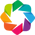

In [15]:
hv.extension('bokeh')


In [ ]:
import hvplot.pandas

In [35]:
day_df['prod']

32         55
33         68
34         98
35        173
36        299
37        388
38        579
39        872
40       1148
41       1293
42       1468
43       1591
44       1758
45       1682
46       1786
47       1990
48       2097
49       1514
50       1514
51       2239
52       2174
53       2115
54       1959
55       1949
56       2308
57       2185
58       2099
59       1987
60       1785
61       1723
62       1645
63       1728
64       1683
65       1519
66       1421
67       1248
68       1089
69        741
70        349
71        637
72        492
73        362
74        240
75        167
128        93
129       118
130       137
131       213
132       333
133       422
134       622
135       783
136      1071
137      1267
138      1148
139      1565
140      1139
141      1673
142      1854
143      2017
144      2026
145      1969
146      1656
147      1561
148      2180
149      1714
150      2322
151      2265
152      2250
153      2034
154      1909
155   

In [37]:
plot = raw_df.hvplot.line(x='time', y='prod')

In [38]:
plot

:Curve   [time]   (prod)

In [16]:
raw_dt_df = raw_df.set_index('time')
prod_dt_curve = hv.Curve(raw_dt_df['prod'])
prod_dt_curve.opts(width=800)

:Curve   [time]   (prod)

In [17]:
raw_dt_df = raw_df.set_index('time')
prod_dt_curve = hv.Curve(raw_dt_df['exp'])
prod_dt_curve.opts(width=800)

:Curve   [time]   (exp)

In [18]:
raw_df.head()

time  prod  cons  exp   imp
0 2019-09-01 00:00:00-03:00     0  1263    0  1263
1 2019-09-01 00:15:00-03:00     0   548    0   548
2 2019-09-01 00:30:00-03:00     0   665    0   665
3 2019-09-01 00:45:00-03:00     0   525    0   525
4 2019-09-01 01:00:00-03:00     0   508    0   508

In [19]:
prod_raw_curve = hv.Curve(raw_df['prod'])
prod_raw_curve.opts(width=800)

:Curve   [index]   (prod)

In [20]:
raw_df.index

RangeIndex(start=0, stop=70176, step=1)

In [21]:
prod_raw_curve = hv.Curve(raw_df, vdims=raw_df['prod'],kdims=raw_df['time'])
prod_raw_curve.opts(width=800)

ValueError: kdims argument expects a Dimension or list of dimensions, specified as tuples, strings, dictionaries or Dimension instances, not a Series type. Ensure you passed the data as the first argument.

In [22]:
raw_dt_df = raw_dt_df.add_suffix('_dt')

In [23]:
raw_dt_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70176 entries, 2019-09-01 00:00:00-03:00 to 2020-06-30 23:45:00-03:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   prod_dt  70176 non-null  int64
 1   cons_dt  70176 non-null  int64
 2   exp_dt   70176 non-null  int64
 3   imp_dt   70176 non-null  int64
dtypes: int64(4)
memory usage: 2.7 MB


In [24]:
comp_df = raw_df.merge(raw_dt_df, right_on=['prod_dt','cons_dt','exp_dt', 'imp_dt'], left_on=['prod','cons','exp', 'imp']).head(100)

In [25]:
pd.set_option('display.max_rows', None)
comp_df.info()# why are there only 100 rows??

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype                           
---  ------   --------------  -----                           
 0   time     100 non-null    datetime64[ns, Atlantic/Bermuda]
 1   prod     100 non-null    int64                           
 2   cons     100 non-null    int64                           
 3   exp      100 non-null    int64                           
 4   imp      100 non-null    int64                           
 5   prod_dt  100 non-null    int64                           
 6   cons_dt  100 non-null    int64                           
 7   exp_dt   100 non-null    int64                           
 8   imp_dt   100 non-null    int64                           
dtypes: datetime64[ns, Atlantic/Bermuda](1), int64(8)
memory usage: 7.8 KB


In [26]:
raw_df.head(200)

time  prod  cons   exp   imp
0   2019-09-01 00:00:00-03:00     0  1263     0  1263
1   2019-09-01 00:15:00-03:00     0   548     0   548
2   2019-09-01 00:30:00-03:00     0   665     0   665
3   2019-09-01 00:45:00-03:00     0   525     0   525
4   2019-09-01 01:00:00-03:00     0   508     0   508
5   2019-09-01 01:15:00-03:00     0   506     0   506
6   2019-09-01 01:30:00-03:00     0   505     0   505
7   2019-09-01 01:45:00-03:00     0   516     0   516
8   2019-09-01 02:00:00-03:00     0   517     0   517
9   2019-09-01 02:15:00-03:00     0   496     0   496
10  2019-09-01 02:30:00-03:00     0   499     0   499
11  2019-09-01 02:45:00-03:00     0   500     0   500
12  2019-09-01 03:00:00-03:00     0   479     0   479
13  2019-09-01 03:15:00-03:00     0   474     0   474
14  2019-09-01 03:30:00-03:00     0   460     0   460
15  2019-09-01 03:45:00-03:00     0   454     0   454
16  2019-09-01 04:00:00-03:00     0   450     0   450
17  2019-09-01 04:15:00-03:00     0   472     0   472
18  2019-09-01 04:30:00-03:00     0   438     0   438
19  2019-09-01 04:45:00-03:00     0   399     0   399
20  2019-09-01 05:00:00-03:00     0   396     0   396
21  2019-09-01 05:15:00-03:00     0   365     0   365
22  2019-09-01 05:30:00-03:00     0   982     0   982
23  2019-09-01 05:45:00-03:00     0   402     0   402
24  2019-09-01 06:00:00-03:00     0   511     0   511
25  2019-09-01 06:15:00-03:00     0   381     0   381
26  2019-09-01 06:30:00-03:00     0   546     0   546
27  2019-09-01 06:45:00-03:00     0   890     0   890
28  2019-09-01 07:00:00-03:00     0   746     0   746
29  2019-09-01 07:15:00-03:00    18   549     0   531
30  2019-09-01 07:30:00-03:00    50   648     0   598
31  2019-09-01 07:45:00-03:00    49   976     0   927
32  2019-09-01 08:00:00-03:00    55  2323     0  2268
33  2019-09-01 08:15:00-03:00    68  2111     0  2043
34  2019-09-01 08:30:00-03:00    98   607     0   509
35  2019-09-01 08:45:00-03:00   173   754     0   581
36  2019-09-01 09:00:00-03:00   299   622     0   323
37  2019-09-01 09:15:00-03:00   388  1383     0   995
38  2019-09-01 09:30:00-03:00   579   576     3     0
39  2019-09-01 09:45:00-03:00   872   919     0    47
40  2019-09-01 10:00:00-03:00  1148   401   747     0
41  2019-09-01 10:15:00-03:00  1293   401   892     0
42  2019-09-01 10:30:00-03:00  1468   385  1083     0
43  2019-09-01 10:45:00-03:00  1591   377  1214     0
44  2019-09-01 11:00:00-03:00  1758   551  1207     0
45  2019-09-01 11:15:00-03:00  1682  2199     0   517
46  2019-09-01 11:30:00-03:00  1786  2019     0   233
47  2019-09-01 11:45:00-03:00  1990  1061   929     0
48  2019-09-01 12:00:00-03:00  2097   304  1793     0
49  2019-09-01 12:15:00-03:00  1514   198  1316     0
50  2019-09-01 12:30:00-03:00  1514   198  1316     0
51  2019-09-01 12:45:00-03:00  2239   274  1965     0
52  2019-09-01 13:00:00-03:00  2174   370  1804     0
53  2019-09-01 13:15:00-03:00  2115   310  1805     0
54  2019-09-01 13:30:00-03:00  1959   332  1627     0
55  2019-09-01 13:45:00-03:00  1949   325  1624     0
56  2019-09-01 14:00:00-03:00  2308   289  2019     0
57  2019-09-01 14:15:00-03:00  2185   458  1727     0
58  2019-09-01 14:30:00-03:00  2099   817  1282     0
59  2019-09-01 14:45:00-03:00  1987  1822   165     0
60  2019-09-01 15:00:00-03:00  1785  2942     0  1157
61  2019-09-01 15:15:00-03:00  1723  2827     0  1104
62  2019-09-01 15:30:00-03:00  1645  2784     0  1139
63  2019-09-01 15:45:00-03:00  1728  1609   119     0
64  2019-09-01 16:00:00-03:00  1683   846   837     0
65  2019-09-01 16:15:00-03:00  1519   880   639     0
66  2019-09-01 16:30:00-03:00  1421   819   602     0
67  2019-09-01 16:45:00-03:00  1248   801   447     0
68  2019-09-01 17:00:00-03:00  1089  1062    27     0
69  2019-09-01 17:15:00-03:00   741   774     0    33
70  2019-09-01 17:30:00-03:00   349   770     0   421
71  2019-09-01 17:45:00-03:00   637   689     0    52
72  2019-09-01 18:00:00-03:00   492   833     0   341
73  2019-09-01 18:15:00-03:00

In [286]:
raw_dt_df.head(200)

prod_dt  cons_dt  exp_dt  imp_dt
time                                                       
2019-09-01 00:00:00-03:00        0     1263       0    1263
2019-09-01 00:15:00-03:00        0      548       0     548
2019-09-01 00:30:00-03:00        0      665       0     665
2019-09-01 00:45:00-03:00        0      525       0     525
2019-09-01 01:00:00-03:00        0      508       0     508
2019-09-01 01:15:00-03:00        0      506       0     506
2019-09-01 01:30:00-03:00        0      505       0     505
2019-09-01 01:45:00-03:00        0      516       0     516
2019-09-01 02:00:00-03:00        0      517       0     517
2019-09-01 02:15:00-03:00        0      496       0     496
2019-09-01 02:30:00-03:00        0      499       0     499
2019-09-01 02:45:00-03:00        0      500       0     500
2019-09-01 03:00:00-03:00        0      479       0     479
2019-09-01 03:15:00-03:00        0      474       0     474
2019-09-01 03:30:00-03:00        0      460       0     460
2019-09-01 03:45:00-03:00        0      454       0     454
2019-09-01 04:00:00-03:00        0      450       0     450
2019-09-01 04:15:00-03:00        0      472       0     472
2019-09-01 04:30:00-03:00        0      438       0     438
2019-09-01 04:45:00-03:00        0      399       0     399
2019-09-01 05:00:00-03:00        0      396       0     396
2019-09-01 05:15:00-03:00        0      365       0     365
2019-09-01 05:30:00-03:00        0      982       0     982
2019-09-01 05:45:00-03:00        0      402       0     402
2019-09-01 06:00:00-03:00        0      511       0     511
2019-09-01 06:15:00-03:00        0      381       0     381
2019-09-01 06:30:00-03:00        0      546       0     546
2019-09-01 06:45:00-03:00        0      890       0     890
2019-09-01 07:00:00-03:00        0      746       0     746
2019-09-01 07:15:00-03:00       18      549       0     531
2019-09-01 07:30:00-03:00       50      648       0     598
2019-09-01 07:45:00-03:00       49      976       0     927
2019-09-01 08:00:00-03:00       55     2323       0    2268
2019-09-01 08:15:00-03:00       68     2111       0    2043
2019-09-01 08:30:00-03:00       98      607       0     509
2019-09-01 08:45:00-03:00      173      754       0     581
2019-09-01 09:00:00-03:00      299      622       0     323
2019-09-01 09:15:00-03:00      388     1383       0     995
2019-09-01 09:30:00-03:00      579      576       3       0
2019-09-01 09:45:00-03:00      872      919       0      47
2019-09-01 10:00:00-03:00     1148      401     747       0
2019-09-01 10:15:00-03:00     1293      401     892       0
2019-09-01 10:30:00-03:00     1468      385    1083       0
2019-09-01 10:45:00-03:00     1591      377    1214       0
2019-09-01 11:00:00-03:00     1758      551    1207       0
2019-09-01 11:15:00-03:00     1682     2199       0     517
2019-09-01 11:30:00-03:00     1786     2019       0     233
2019-09-01 11:45:00-03:00     1990     1061     929       0
2019-09-01 12:00:00-03:00     2097      304    1793       0
2019-09-01 12:15:00-03:00     1514      198    1316       0
2019-09-01 12:30:00-03:00     1514      198    1316       0
2019-09-01 12:45:00-03:00     2239      274    1965       0
2019-09-01 13:00:00-03:00     2174      370    1804       0
2019-09-01 13:15:00-03:00     2115      310    1805       0
2019-09-01 13:30:00-03:00     1959      332    1627       0
2019-09-01 13:45:00-03:00     1949      325    1624       0
2019-09-01 14:00:00-03:00     2308      289    2019       0
2019-09-01 14:15:00-03:00     2185      458    1727       0
2019-09-01 14:30:00-03:00     2099      817    1282       0
2019-09-01 14:45:00-03:00     1987     1822     165       0
2019-09-01 15:00:00-03:00     1785     2942       0    1157
2019-09-01 15:15:00-03:00     1723     2827       0    1104
2019-09-01 15:30:00-03:00     1645     2784       0    1139
2019-09-01 15:45:00-03:00     1728     1609     119       0
2019-09-01 16:00:00-03:00     1683      846     837       0
2019-09

<AxesSubplot:xlabel='time'>

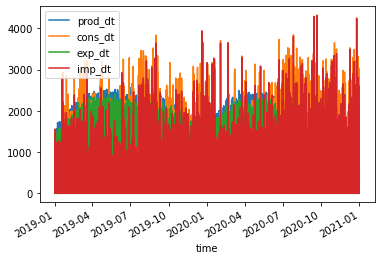

In [290]:
raw_dt_df.plot()

<AxesSubplot:>

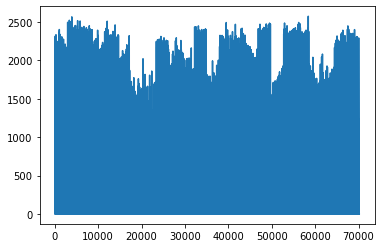

In [300]:
raw_df['prod'].plot()

In [299]:
import panel as pn
import bokeh
from bokeh.resources import INLINE
from bokeh.models import HoverTool
from bokeh.models import CustomJSHover
